In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YooSeok\Anaconda3\envs\Keras\lib

In [21]:
df_data = pd.read_csv('3data.csv')
print(df_data.shape)

(55032, 10)


In [22]:
df_data.head(10)

,Time,1temp,1hum,1lux,2temp,2hum,2lux,3temp,3hum,3lux
0,2018-08-10 09:45:10 UTC,26.51000,57.29000,941,26.20001,64.49000,984,26.82999,58.60999,201
1,2018-08-10 09:45:49 UTC,26.50000,57.45000,951,26.09000,64.49000,984,26.74001,58.91001,201
2,2018-08-10 09:46:37 UTC,26.50000,57.55999,951,25.90999,64.53001,832,26.70001,59.26000,929
3,2018-08-10 09:47:26 UTC,26.50000,57.59999,951,25.73001,65.39000,997,26.70001,59.50000,930
4,2018-08-10 09:48:14 UTC,26.50000,57.57999,951,25.62000,65.73001,996,26.70001,59.50000,930
5,2018-08-10 09:49:03 UTC,26.51000,57.52000,951,25.54000,65.93001,996,26.70001,59.51000,930
6,2018-08-10 09:49:52 UTC,26.58000,57.45000,952,25.50000,65.96001,996,26.73000,59.48000,930
7,2018-08-10 09:50:41 UTC,26.61000,57.39001,952,25.50000,65.92001,997,26.79000,59.47001,930
8,2018-08-10 09:51:29 UTC,26.67000,57.34000,952,25.50000,65.88002,997,26.85000,59.38001,930
9,2018-08-10 09:52:19 UTC,26.70001,57.22000,952,25.51000,65.77998,997,26.89000,59.36000,930


In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55032 entries, 0 to 55031
Data columns (total 10 columns):
Time     55032 non-null object
1temp    55032 non-null float64
1hum     55032 non-null float64
1lux     55032 non-null int64
2temp    55032 non-null float64
2hum     55032 non-null float64
2lux     55032 non-null int64
3temp    40173 non-null float64
3hum     40172 non-null float64
3lux     55032 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.2+ MB


In [24]:
df_data['Time'] = pd.to_datetime(df_data['Time'])

In [25]:
hour, minute, second = [], [], []
for i in range(np.size(df_data, 0)):
    hour.append(df_data['Time'][i].hour)
    minute.append(df_data['Time'][i].minute)
    second.append(df_data['Time'][i].second)

In [26]:
hour = np.array(hour).reshape(-1, 1)
minute = np.array(minute).reshape(-1, 1)
second = np.array(second).reshape(-1, 1)

print(hour.shape, minute.shape, second.shape)

(55032, 1) (55032, 1) (55032, 1)


In [27]:
lux1 = df_data['1lux'].values.reshape(-1, 1)
lux2 = df_data['2lux'].values.reshape(-1, 1)
lux3 = df_data['3lux'].values.reshape(-1, 1)
print(lux1.shape)

(55032, 1)


In [29]:
lux1 = (lux1 - lux1.mean()) / lux1.std()
lux2 = (lux2 - lux2.mean()) / lux2.std()
lux3 = (lux3 - lux3.mean()) / lux3.std()

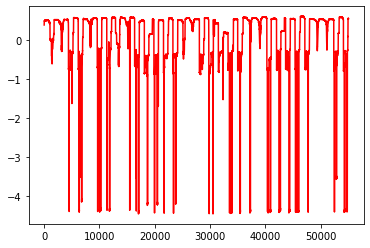

In [30]:
plt.plot(lux1[:,0], 'r', label='y_true')
plt.show()

In [32]:
data = np.concatenate((hour, minute, second, lux1, lux2, lux3), axis=1)
print(data.shape)

(55032, 6)


In [33]:
data[:10]

array([[ 9.        , 45.        , 10.        ,  0.39262547,  0.30684471,
        -3.85108962],
       [ 9.        , 45.        , 49.        ,  0.45493545,  0.30684471,
        -3.85108962],
       [ 9.        , 46.        , 37.        ,  0.45493545, -1.114508  ,
         0.47622731],
       [ 9.        , 47.        , 26.        ,  0.45493545,  0.42840777,
         0.48217142],
       [ 9.        , 48.        , 14.        ,  0.45493545,  0.41905677,
         0.48217142],
       [ 9.        , 49.        ,  3.        ,  0.45493545,  0.41905677,
         0.48217142],
       [ 9.        , 49.        , 52.        ,  0.46116645,  0.41905677,
         0.48217142],
       [ 9.        , 50.        , 41.        ,  0.46116645,  0.42840777,
         0.48217142],
       [ 9.        , 51.        , 29.        ,  0.46116645,  0.42840777,
         0.48217142],
       [ 9.        , 52.        , 19.        ,  0.46116645,  0.42840777,
         0.48217142]])

In [35]:
train_data = data[:40000]
train_lux1 = lux1[:40000]
print(train_data.shape, train_lux1.shape)

(40000, 6) (40000, 1)


In [36]:
test_data = data[40001:]
test_lux1 = lux1[40001:]
print(test_data.shape, test_lux1.shape)

(15031, 6) (15031, 1)


In [37]:
lag=15 # 몇분 후 의 데이터를 input feature로 할지(?)

In [38]:
arr = []
for i in range(15):
    arr.append(train_data[i:i-lag,:])

arr = np.array(arr, dtype=np.float32)
print(arr.shape)

(15, 39985, 6)


In [39]:
#arr[:15,:10,:4]

In [41]:
x_train_val = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11], arr[12], arr[13], arr[14]), axis=1).reshape(-1, 15, 6)
train_mean, train_std = np.mean(x_train_val, axis=0), np.std(x_train_val, axis=0)
train_mean, train_std = np.mean(train_mean, axis=0), np.mean(train_std, axis=0)

In [42]:
y_train_val = train_lux1[lag:, :].reshape(-1, 1)

In [43]:
print(x_train_val.shape, y_train_val.shape)

(39985, 15, 6) (39985, 1)


In [44]:
arr = []
for i in range(15):
    arr.append(test_data[i:i-lag,:])
    
arr = np.array(arr, dtype=np.float32)
print(arr.shape)


(15, 15016, 6)


In [46]:
x_test = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11], arr[12], arr[13], arr[14]), axis=1).reshape(-1, 15, 6)
y_test = test_lux1[lag:, :].reshape(-1, 1)
print(x_test.shape, y_test.shape)

(15016, 15, 6) (15016, 1)


In [47]:
# split into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(31988, 15, 6) (31988, 1) (7997, 15, 6) (7997, 1)


In [52]:
h_units = 64
activation_ = 'relu'

def rnn_model():
    model = Sequential()
    model.add(LSTM(units=h_units, return_sequences=True, input_shape=(15, 6)))        
    model.add(LSTM(units=h_units, return_sequences=False))
    model.add(Dense(64))
    model.add(Dense(1))
    
    return model

In [53]:
# create a model 
model = rnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 15, 64)            18176     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 55,425
Trainable params: 55,425
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
# training
tensorBoard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=False, validation_data=(x_val, y_val), shuffle=True, callbacks=[tensorBoard])

Instructions for updating:
Use tf.cast instead.


In [56]:
y_pred = model.predict(x_test, batch_size=1024, verbose=True) 
print(y_pred.shape)
print(model.evaluate(x_test, y_test,batch_size=1024))

15016/15016 [==============================] - 1s 36us/step
(15016, 1)
15016/15016 [==============================] - 0s 25us/step
0.03435054915219339


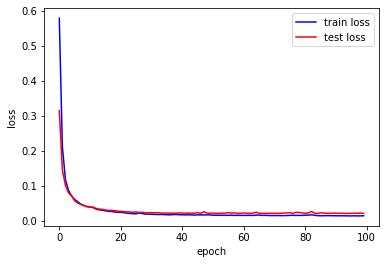

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

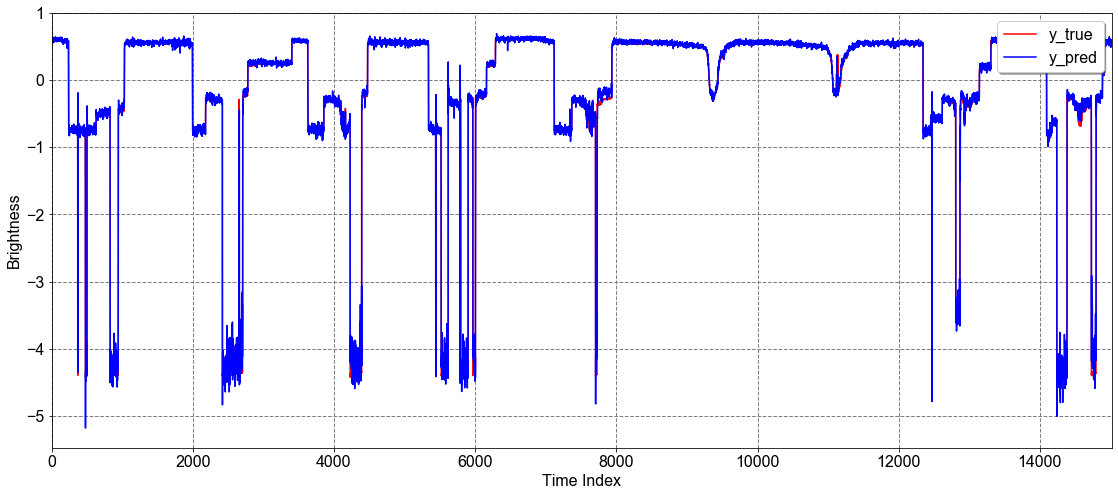

In [58]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,0], 'r', label='y_true')
plt.plot(y_pred[:,0], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index')
plt.ylabel('Brightness')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
#plt.ylim(bottom = -5) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,16000,2000))
#plt.yticks(np.arange(0,1,1))

# save & display figure
plt.savefig('pred_graph.png', dpi=300)
plt.show()

In [59]:
#모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
#valScore = model.evaluate(x_val, y_val, verbose=0)
#print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.01395119833837991
Test Score:  0.03435055002273439


In [60]:
#MAPE

y_test, y_pred = np.array(y_test), np.array(y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ', mape)

MAPE:  13.838364088605971


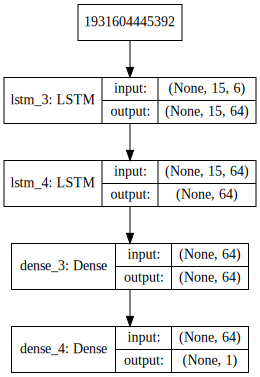

In [61]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))